## Demo notebook for accessing MTBS data on Azure

This notebook provides an example of accessing Monitoring Trends in Burn Severity (MTBS) Mosiacs for CONUS and Alaska from blob storage on Azure. The data is stored in annual cloud optimized GeoTIFF files.

MTBS data are stored in the West Europe Azure region, so this notebook will run most efficiently on Azure compute located in West Europe.  We recommend that substantial computation depending on MTBS data also be situated in West Europe.  You don't want to download hundreds of terabytes to your laptop!  If you are using MTBS data for environmental science applications, consider applying for an [AI for Earth grant](http://aka.ms/ai4egrants) to support your compute requirements.

### Imports and constants

In [1]:
import xarray as xr
from adlfs import AzureBlobFileSystem

# Year to investigate and plot
year = 2018 

# Storage resources
storage_account_name = 'cpdataeuwest'
region = 'conus' # 'conus' or 'ak'
folder = f'cpdata/raw/mtbs/{region}/30m/severity'

### List the data files

The MTBS data on Azure is available for either the CONUS or Alaska region.

We can use `adlfs` to list the files in either region:

In [2]:
fs = AzureBlobFileSystem(account_name=storage_account_name)
mosaic_files = fs.glob(folder + '/*.tif')
print('Found {} mosaic files:'.format(len(mosaic_files)))
for k in range(0,10):
    print(mosaic_files[k])
print('...')    

Found 35 mosaic files:
cpdata/raw/mtbs/conus/30m/severity/1984.tif
cpdata/raw/mtbs/conus/30m/severity/1985.tif
cpdata/raw/mtbs/conus/30m/severity/1986.tif
cpdata/raw/mtbs/conus/30m/severity/1987.tif
cpdata/raw/mtbs/conus/30m/severity/1988.tif
cpdata/raw/mtbs/conus/30m/severity/1989.tif
cpdata/raw/mtbs/conus/30m/severity/1990.tif
cpdata/raw/mtbs/conus/30m/severity/1991.tif
cpdata/raw/mtbs/conus/30m/severity/1992.tif
cpdata/raw/mtbs/conus/30m/severity/1993.tif
...


### Open one data file with xarray

In [3]:
url = 'https://' + storage_account_name + '.blob.core.windows.net/' + \
  folder + '/' + str(year) + '.tif'
print('Reading data from {}'.format(url))
da = xr.open_rasterio(url,chunks={'x': 2560, 'y': 2560})
da

Reading data from https://cpdataeuwest.blob.core.windows.net/cpdata/raw/mtbs/conus/30m/severity/2018.tif


,Array,Chunk
Bytes,4.90 GB,6.55 MB
Shape,"(1, 70357, 69612)","(1, 2560, 2560)"
Count,785 Tasks,784 Chunks
Type,uint8,numpy.ndarray


### Plot one fire event

We can select a subset of the data to make a plot over a single fire event.

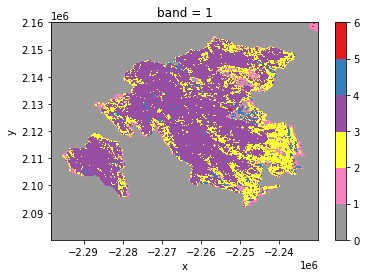

In [4]:
da.sel(band=1, y=slice(2.16e6, 2.08e6), 
       x=slice(None, -2.23e6)).plot.contourf(cmap='Set1_r')